Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import  LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

Importing dataset and encoding with 'latin-1' as it is not possible to encode the dataset with 'utf-8'

In [2]:
data = pd.read_csv('laptop_price.csv', encoding='latin-1')

In [3]:
data.head()
list(data.columns)

['laptop_ID',
 'Company',
 'Product',
 'TypeName',
 'Inches',
 'ScreenResolution',
 'Cpu',
 'Ram',
 'Memory',
 'Gpu',
 'OpSys',
 'Weight',
 'Price_euros']

Counting the number of null values in all the columns

In [4]:
data.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

Removing 'GB' and 'kg' in 'Ram' and 'Weight' columns

In [5]:
data['Ram']=data['Ram'].str.replace('GB','')
data['Weight']=data['Weight'].str.replace('kg','')
data.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


Converting 'Ram' and 'Weight' columns to int and float from object data type

In [7]:
data['Ram']=data['Ram'].astype('int32')
data['Weight']=data['Weight'].astype('float32')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   int32  
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   float32
 12  Price_euros       1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), int64(1), object(8)
memory usage: 122.3+ KB


Creating a column for touch feature in laptop and plotting the same against its counts

In [8]:
data['TouchScreen']=data['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
data.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0


Creating a column for IPS feature in laptop and plotting against its counts

In [9]:
data['IPS']=data['ScreenResolution'].apply(lambda x:1 if'IPS' in x else 0)
data.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1


Creating two new columns for resolution using 'ScreenResolution' column

In [10]:
new=data['ScreenResolution'].str.split('x',n=1,expand=True)
data['X_res']=new[0]
data['Y_res']=new[1]
data

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,X_res,Y_res
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,IPS Panel Retina Display 2560,1600
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,Full HD 1920,1080
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,IPS Panel Retina Display 2880,1800
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,IPS Panel Retina Display 2560,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,638.00,1,1,IPS Panel Full HD / Touchscreen 1920,1080
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,1499.00,1,1,IPS Panel Quad HD+ / Touchscreen 3200,1800
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,229.00,0,0,1366,768
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,764.00,0,0,1366,768


Removing the strings in 'X_res' column 

In [11]:
data['X_res'] = data['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])
data.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,X_res,Y_res
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,2560,1600
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,1920,1080
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,2880,1800
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,2560,1600


Converting data types of 'X_res' and 'Y_res' columns to int

In [12]:
data['X_res']=data['X_res'].astype('int')
data['Y_res']=data['Y_res'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   int32  
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   float32
 12  Price_euros       1303 non-null   float64
 13  TouchScreen       1303 non-null   int64  
 14  IPS               1303 non-null   int64  
 15  X_res             1303 non-null   int64  
 16  Y_res             1303 non-null   int64  


Creating the feature PPI (Pixel per inch) using 'X_res', 'Y_res' and 'Inches' columns

In [13]:
data['PPI'] = (((data['X_res']**2) + (data['Y_res']**2))**0.5/data['Inches']).astype('float')
data.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,X_res,Y_res,PPI
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,2560,1600,226.983005
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900,127.677940
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,1920,1080,141.211998
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,2880,1800,220.534624
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,2560,1600,226.983005


Dropping 'ScreenResolution','Inches','X_res' and 'Y_res' columns

In [14]:
data.drop(columns=['ScreenResolution','Inches','X_res','Y_res'],inplace=True)
data.head()

,laptop_ID,Company,Product,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,PPI
0,1,Apple,MacBook Pro,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005
1,2,Apple,Macbook Air,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940
2,3,HP,250 G6,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998
3,4,Apple,MacBook Pro,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624
4,5,Apple,MacBook Pro,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005


Creating subsidiary columns for 'Cpu'

In [15]:
data['Cpu_Name']=data['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))
data.head()

,laptop_ID,Company,Product,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,PPI,Cpu_Name
0,1,Apple,MacBook Pro,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5
1,2,Apple,Macbook Air,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5
2,3,HP,250 G6,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5
3,4,Apple,MacBook Pro,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7
4,5,Apple,MacBook Pro,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5


Creating a function for segregating processor names and the function is called for 'Cpu_Name' column

In [16]:
def processor_name(name):
    if name == 'Intel Core i7' or name == 'Intel Core i5' or name == 'Intel Core i3':
        return name
    else:
        if name.split()[0] == 'Intel':
            return 'Intel Processor'
        else:
            return 'AMD Processor'

In [17]:
data['Cpu_brand']=data['Cpu_Name'].apply(processor_name)
data.head()

,laptop_ID,Company,Product,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,PPI,Cpu_Name,Cpu_brand
0,1,Apple,MacBook Pro,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,Intel Core i5
1,2,Apple,Macbook Air,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,Intel Core i5
2,3,HP,250 G6,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,Intel Core i5
3,4,Apple,MacBook Pro,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,Intel Core i7
4,5,Apple,MacBook Pro,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,Intel Core i5


Creating a separate column for CPU speed

In [18]:
data['CPU_Speed'] = data['Cpu'].str.split().str[-1]
data['CPU_Speed'] = data['CPU_Speed'].str.replace("GHz", '')
data.head()

,laptop_ID,Company,Product,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,PPI,Cpu_Name,Cpu_brand,CPU_Speed
0,1,Apple,MacBook Pro,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,Intel Core i5,2.3
1,2,Apple,Macbook Air,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,Intel Core i5,1.8
2,3,HP,250 G6,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,Intel Core i5,2.5
3,4,Apple,MacBook Pro,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,Intel Core i7,2.7
4,5,Apple,MacBook Pro,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,Intel Core i5,3.1


Dropping 'Cpu' and 'Cpu_Name' columns

In [19]:
data.drop(columns=['Cpu','Cpu_Name'],inplace=True)
data.head()

,laptop_ID,Company,Product,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,PPI,Cpu_brand,CPU_Speed
0,1,Apple,MacBook Pro,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,2.3
1,2,Apple,Macbook Air,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,1.8
2,3,HP,250 G6,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,2.5
3,4,Apple,MacBook Pro,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,2.7
4,5,Apple,MacBook Pro,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,3.1


Deriving Primary Memory and Secondary Memory columns, because several laptops will have combination of memories

Splitting them as Primary and Secondary Memory with '+' as the delimeter

In [20]:
data['Prim_Memory'] = data['Memory'].str.split("+").str[0]
data['Sec_Memory'] = data['Memory'].str.split("+").str[1]
data.head()

,laptop_ID,Company,Product,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,PPI,Cpu_brand,CPU_Speed,Prim_Memory,Sec_Memory
0,1,Apple,MacBook Pro,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,2.3,128GB SSD,NaN
1,2,Apple,Macbook Air,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,1.8,128GB Flash Storage,NaN
2,3,HP,250 G6,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,2.5,256GB SSD,NaN
3,4,Apple,MacBook Pro,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,2.7,512GB SSD,NaN
4,5,Apple,MacBook Pro,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,3.1,256GB SSD,NaN


Also a column with the memory type is being created which will contain the types SSD, HDD or Flash Storage

In [21]:
data['Prim_Memory'] = data['Prim_Memory'].str.strip()
data['Prim_Memory_Type'] = data['Prim_Memory'].str.split(" ").str[1:]
data['Prim_Memory'] = data['Prim_Memory'].str.split(" ").str[0]
data['Prim_Memory_Type'] = data['Prim_Memory_Type'].str.join(" ")
data.head()

,laptop_ID,Company,Product,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,PPI,Cpu_brand,CPU_Speed,Prim_Memory,Sec_Memory,Prim_Memory_Type
0,1,Apple,MacBook Pro,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,2.3,128GB,NaN,SSD
1,2,Apple,Macbook Air,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,1.8,128GB,NaN,Flash Storage
2,3,HP,250 G6,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,2.5,256GB,NaN,SSD
3,4,Apple,MacBook Pro,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,2.7,512GB,NaN,SSD
4,5,Apple,MacBook Pro,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,3.1,256GB,NaN,SSD


In [22]:
data['Sec_Memory'] = data['Sec_Memory'].str.strip()
data['Sec_Memory_Type'] = data['Sec_Memory'].str.split(" ").str[1]
data.head()

,laptop_ID,Company,Product,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,PPI,Cpu_brand,CPU_Speed,Prim_Memory,Sec_Memory,Prim_Memory_Type,Sec_Memory_Type
0,1,Apple,MacBook Pro,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,2.3,128GB,NaN,SSD,NaN
1,2,Apple,Macbook Air,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,1.8,128GB,NaN,Flash Storage,NaN
2,3,HP,250 G6,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,2.5,256GB,NaN,SSD,NaN
3,4,Apple,MacBook Pro,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,2.7,512GB,NaN,SSD,NaN
4,5,Apple,MacBook Pro,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,3.1,256GB,NaN,SSD,NaN


In [23]:
data['Sec_Memory'] = data['Memory'].str.split("+").str[1]
data['Sec_Memory'] = data['Sec_Memory'].str.strip()
data['Sec_Memory'] = data['Sec_Memory'].str.split(" ").str[0]
data

,laptop_ID,Company,Product,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,PPI,Cpu_brand,CPU_Speed,Prim_Memory,Sec_Memory,Prim_Memory_Type,Sec_Memory_Type
0,1,Apple,MacBook Pro,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,2.3,128GB,NaN,SSD,NaN
1,2,Apple,Macbook Air,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,1.8,128GB,NaN,Flash Storage,NaN
2,3,HP,250 G6,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,2.5,256GB,NaN,SSD,NaN
3,4,Apple,MacBook Pro,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,2.7,512GB,NaN,SSD,NaN
4,5,Apple,MacBook Pro,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,3.1,256GB,NaN,SSD,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,638.00,1,1,157.350512,Intel Core i7,2.5,128GB,NaN,SSD,NaN
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,1499.00,1,1,276.053530,Intel Core i7,2.5,512GB,NaN,SSD,NaN
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,229.00,0,0,111.935204,Intel Processor,1.6,64GB,NaN,Flash Storage,NaN
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,764.00,0,0,100.454670,Intel Core i7,2.5,1TB,NaN,HDD,NaN


As several laptops won't have the Secondary Memory, 0 for the memory size and NA for type are being assigned

In [24]:
data['Sec_Memory'] = data['Sec_Memory'].fillna("0")
data['Sec_Memory_Type'] = data['Sec_Memory_Type'].fillna("NA")
data

,laptop_ID,Company,Product,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,PPI,Cpu_brand,CPU_Speed,Prim_Memory,Sec_Memory,Prim_Memory_Type,Sec_Memory_Type
0,1,Apple,MacBook Pro,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,2.3,128GB,0,SSD,NA
1,2,Apple,Macbook Air,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,1.8,128GB,0,Flash Storage,NA
2,3,HP,250 G6,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,2.5,256GB,0,SSD,NA
3,4,Apple,MacBook Pro,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,2.7,512GB,0,SSD,NA
4,5,Apple,MacBook Pro,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,3.1,256GB,0,SSD,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,638.00,1,1,157.350512,Intel Core i7,2.5,128GB,0,SSD,NA
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,1499.00,1,1,276.053530,Intel Core i7,2.5,512GB,0,SSD,NA
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,229.00,0,0,111.935204,Intel Processor,1.6,64GB,0,Flash Storage,NA
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,764.00,0,0,100.454670,Intel Core i7,2.5,1TB,0,HDD,NA


Memory sizes with 'TB' are being replaced with zeroes followed by 'GB' to maintain homogeneity in data

In [25]:
data['Prim_Memory'] = data['Prim_Memory'].replace({'1TB' : '1000GB', '1.0TB' : '1000GB', '2TB' : '2000GB' }) 

data['Sec_Memory'] = data['Sec_Memory'].replace({'1TB' : '1000GB', '1.0TB' : '1000GB', '2TB' : '2000GB' }) 

'GB's in memory sizes are being removed to be able to process the data for learning later

In [26]:
data['Prim_Memory'] = data['Prim_Memory'].replace('GB', '', regex=True).fillna(0).astype(int)
data['Sec_Memory'] = data['Sec_Memory'].replace('GB', '', regex=True).fillna(0).astype(int)

In [27]:
data.head()

,laptop_ID,Company,Product,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,PPI,Cpu_brand,CPU_Speed,Prim_Memory,Sec_Memory,Prim_Memory_Type,Sec_Memory_Type
0,1,Apple,MacBook Pro,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,2.3,128,0,SSD,NA
1,2,Apple,Macbook Air,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,1.8,128,0,Flash Storage,NA
2,3,HP,250 G6,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,2.5,256,0,SSD,NA
3,4,Apple,MacBook Pro,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,2.7,512,0,SSD,NA
4,5,Apple,MacBook Pro,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,3.1,256,0,SSD,NA


Dropping 'Memory' because we will be using the derived columns for prediction

In [28]:
data = data.drop('Memory', axis=1)

In [29]:
data.head()

,laptop_ID,Company,Product,TypeName,Ram,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,PPI,Cpu_brand,CPU_Speed,Prim_Memory,Sec_Memory,Prim_Memory_Type,Sec_Memory_Type
0,1,Apple,MacBook Pro,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,2.3,128,0,SSD,NA
1,2,Apple,Macbook Air,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,1.8,128,0,Flash Storage,NA
2,3,HP,250 G6,Notebook,8,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,2.5,256,0,SSD,NA
3,4,Apple,MacBook Pro,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,2.7,512,0,SSD,NA
4,5,Apple,MacBook Pro,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,3.1,256,0,SSD,NA


Aggregating OS names to thier Parent OS

In [30]:
data['OpSys'] = data['OpSys'].replace({'Windows 10' : 'Windows', 'Windows 10 S' : 'Windows', 'Windows 7' : 'Windows', 'Mac OS X' : 'macOS' })

In [31]:
data.head()

,laptop_ID,Company,Product,TypeName,Ram,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,PPI,Cpu_brand,CPU_Speed,Prim_Memory,Sec_Memory,Prim_Memory_Type,Sec_Memory_Type
0,1,Apple,MacBook Pro,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,2.3,128,0,SSD,NA
1,2,Apple,Macbook Air,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,1.8,128,0,Flash Storage,NA
2,3,HP,250 G6,Notebook,8,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,2.5,256,0,SSD,NA
3,4,Apple,MacBook Pro,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,2.7,512,0,SSD,NA
4,5,Apple,MacBook Pro,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,3.1,256,0,SSD,NA


Creating a column with only GPU brand names

In [32]:
data['GPU_brand'] = data['Gpu'].str.split(' ').str[0]
data.head()

,laptop_ID,Company,Product,TypeName,Ram,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,PPI,Cpu_brand,CPU_Speed,Prim_Memory,Sec_Memory,Prim_Memory_Type,Sec_Memory_Type,GPU_brand
0,1,Apple,MacBook Pro,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,2.3,128,0,SSD,NA,Intel
1,2,Apple,Macbook Air,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,1.8,128,0,Flash Storage,NA,Intel
2,3,HP,250 G6,Notebook,8,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,2.5,256,0,SSD,NA,Intel
3,4,Apple,MacBook Pro,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,2.7,512,0,SSD,NA,AMD
4,5,Apple,MacBook Pro,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,3.1,256,0,SSD,NA,Intel


Dropping 'Gpu' column as it's no longer relevant

In [33]:
data = data.drop('Gpu', axis=1)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Ram               1303 non-null   int32  
 5   OpSys             1303 non-null   object 
 6   Weight            1303 non-null   float32
 7   Price_euros       1303 non-null   float64
 8   TouchScreen       1303 non-null   int64  
 9   IPS               1303 non-null   int64  
 10  PPI               1303 non-null   float64
 11  Cpu_brand         1303 non-null   object 
 12  CPU_Speed         1303 non-null   object 
 13  Prim_Memory       1303 non-null   int64  
 14  Sec_Memory        1303 non-null   int64  
 15  Prim_Memory_Type  1303 non-null   object 
 16  Sec_Memory_Type   1303 non-null   object 


Changing data types of few columns from 'object' to their respective data types

In [35]:
data['Company'] = data.Company.astype(str)
data['TypeName'] = data.TypeName.astype(str)
data['CPU_Speed'] = data.CPU_Speed.astype(float)
data['GPU_brand'] = data.GPU_brand.astype(str)
data['Ram'] = data.Ram.astype(int)
data['Weight'] = data.Weight.astype(float)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Ram               1303 non-null   int64  
 5   OpSys             1303 non-null   object 
 6   Weight            1303 non-null   float64
 7   Price_euros       1303 non-null   float64
 8   TouchScreen       1303 non-null   int64  
 9   IPS               1303 non-null   int64  
 10  PPI               1303 non-null   float64
 11  Cpu_brand         1303 non-null   object 
 12  CPU_Speed         1303 non-null   float64
 13  Prim_Memory       1303 non-null   int64  
 14  Sec_Memory        1303 non-null   int64  
 15  Prim_Memory_Type  1303 non-null   object 
 16  Sec_Memory_Type   1303 non-null   object 


In [37]:
data.head()


,laptop_ID,Company,Product,TypeName,Ram,OpSys,Weight,Price_euros,TouchScreen,IPS,PPI,Cpu_brand,CPU_Speed,Prim_Memory,Sec_Memory,Prim_Memory_Type,Sec_Memory_Type,GPU_brand
0,1,Apple,MacBook Pro,Ultrabook,8,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,2.3,128,0,SSD,NA,Intel
1,2,Apple,Macbook Air,Ultrabook,8,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,1.8,128,0,Flash Storage,NA,Intel
2,3,HP,250 G6,Notebook,8,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,2.5,256,0,SSD,NA,Intel
3,4,Apple,MacBook Pro,Ultrabook,16,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,2.7,512,0,SSD,NA,AMD
4,5,Apple,MacBook Pro,Ultrabook,8,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,3.1,256,0,SSD,NA,Intel


Generating few visualizations to understand patterns in correlation between the columns

<AxesSubplot: title={'center': 'Laptop RAM sizes by Company'}, xlabel='Ram', ylabel='Company'>

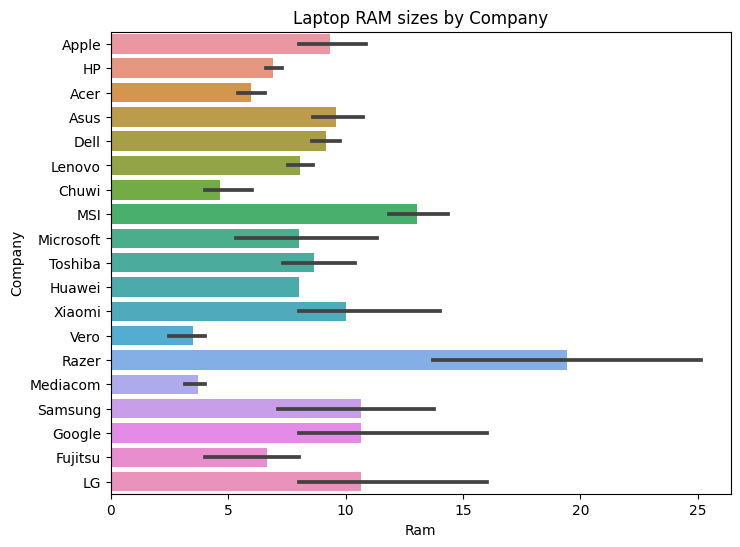

In [38]:
fig = plt.figure(figsize=(8, 6))
plt.title('Laptop RAM sizes by Company')
sns.barplot(x='Ram', y='Company', data=data)

We could see that most of the RAM sizes are around 10 or below 10 and we could also say that laptops with RAM sizes more than 10 are high end variants which are capable of performing very well compared to other ones

<AxesSubplot: title={'center': 'Laptop Prices by Company'}, xlabel='Price_euros', ylabel='Company'>

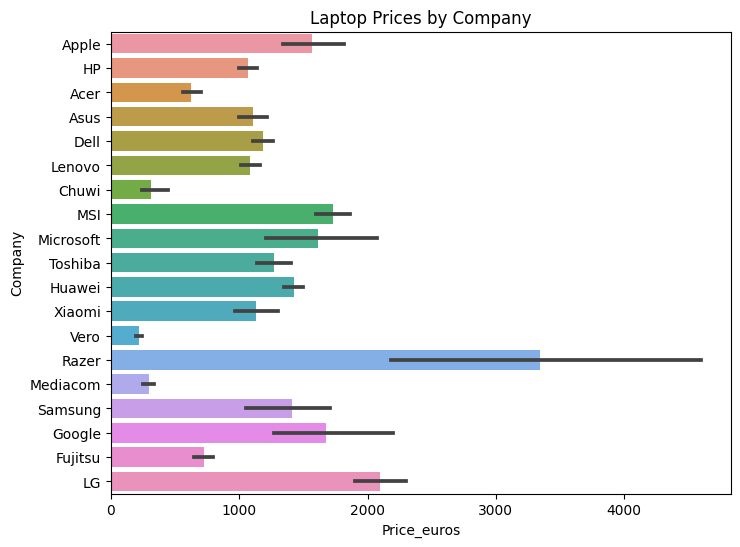

In [39]:
fig = plt.figure(figsize=(8, 6))
plt.title('Laptop Prices by Company')
sns.barplot(x='Price_euros', y='Company', data=data)

Through this graph we can infer that Razer being priced high, which makes sense because correspondingly Razer laptops have high sized RAMs 

<AxesSubplot: title={'center': 'Laptop Prices by amount of Ram(GB)'}, xlabel='Ram', ylabel='Price_euros'>

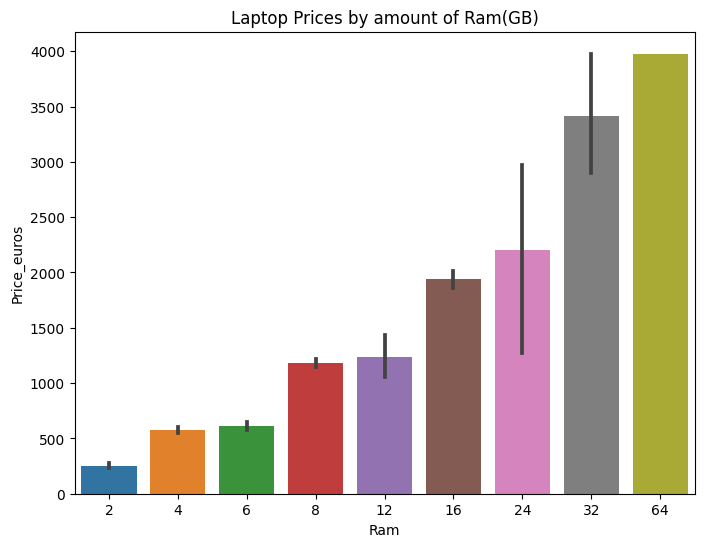

In [40]:
fig = plt.figure(figsize=(8, 6))
plt.title('Laptop Prices by amount of Ram(GB)')
sns.barplot(x='Ram', y='Price_euros', data=data)

This makes clear that with increase in RAM size price of the laptop increases

<AxesSubplot: title={'center': 'Laptop Prices by Processor'}, xlabel='Cpu_brand', ylabel='Price_euros'>

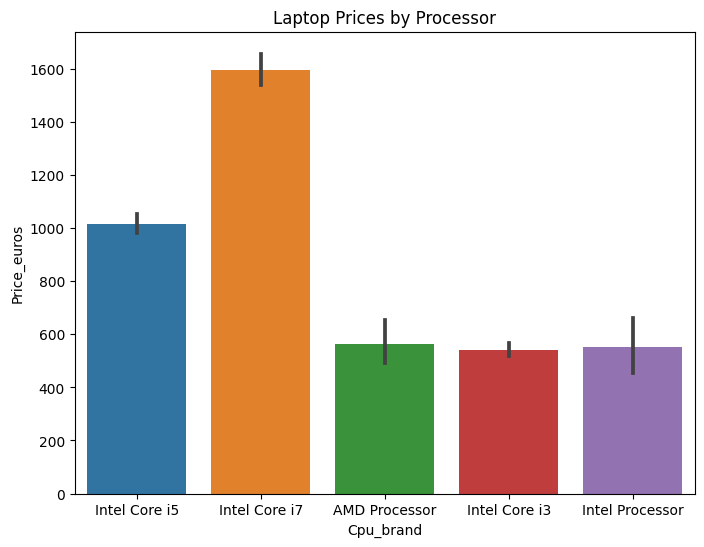

In [41]:
fig = plt.figure(figsize=(8, 6))
plt.title('Laptop Prices by Processor')
sns.barplot(x='Cpu_brand', y='Price_euros', data=data)

Presence of the processor 'Intel Core i7' seems to increase the price of the laptops

<AxesSubplot: title={'center': 'Laptop Prices by Memory type'}, xlabel='Prim_Memory_Type', ylabel='Price_euros'>

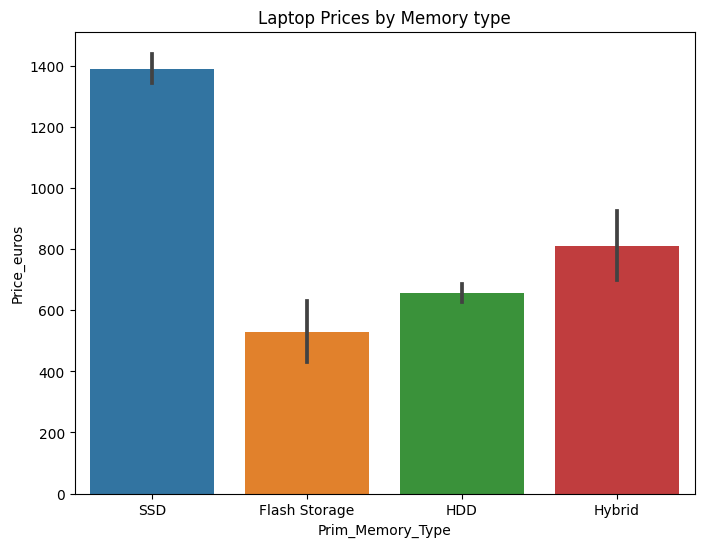

In [42]:
fig = plt.figure(figsize=(8, 6))
plt.title('Laptop Prices by Memory type')
sns.barplot(x='Prim_Memory_Type', y='Price_euros', data=data)

Presence of 'SSD' seems to increase the price of the laptop, while combination of memories stands next

<AxesSubplot: title={'center': 'Laptop Prices by CPU Speed'}, xlabel='CPU_Speed', ylabel='Price_euros'>

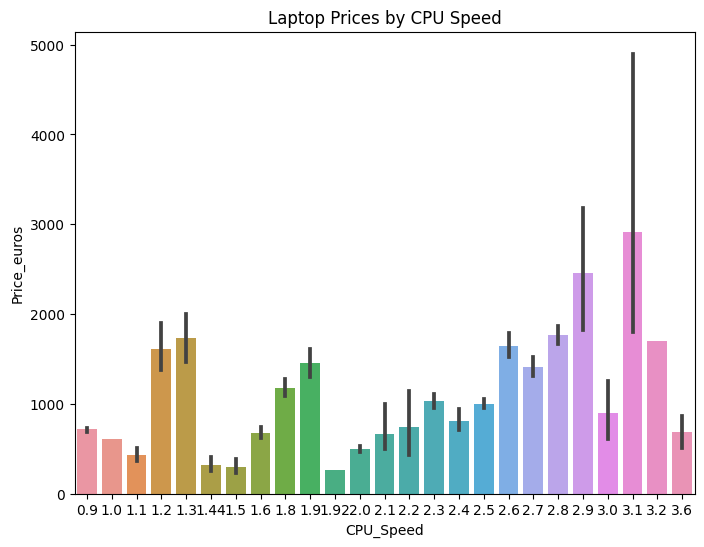

In [43]:
fig = plt.figure(figsize=(8, 6))
plt.title('Laptop Prices by CPU Speed')
sns.barplot(x='CPU_Speed', y='Price_euros', data=data)


This visualization infers that 'CPU_Speed' and prices aren't directly proportional, but can kind of confirm that higher CPU Speed more price

In [44]:
data.shape
data.head()

,laptop_ID,Company,Product,TypeName,Ram,OpSys,Weight,Price_euros,TouchScreen,IPS,PPI,Cpu_brand,CPU_Speed,Prim_Memory,Sec_Memory,Prim_Memory_Type,Sec_Memory_Type,GPU_brand
0,1,Apple,MacBook Pro,Ultrabook,8,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,2.3,128,0,SSD,NA,Intel
1,2,Apple,Macbook Air,Ultrabook,8,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,1.8,128,0,Flash Storage,NA,Intel
2,3,HP,250 G6,Notebook,8,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,2.5,256,0,SSD,NA,Intel
3,4,Apple,MacBook Pro,Ultrabook,16,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,2.7,512,0,SSD,NA,AMD
4,5,Apple,MacBook Pro,Ultrabook,8,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,3.1,256,0,SSD,NA,Intel


Using Ordincal Encoder to encode categories as integers

In [45]:
from sklearn.preprocessing import OrdinalEncoder
temp = data
cols = ['Company', 'Product', 'TypeName', 'Cpu_brand', 'GPU_brand', 'OpSys', 'TouchScreen','Prim_Memory','Sec_Memory', 'Prim_Memory_Type', 'Sec_Memory_Type']

In [46]:
ord_encoder = OrdinalEncoder()
temp[cols] = ord_encoder.fit_transform(temp[cols])
temp.head()

,laptop_ID,Company,Product,TypeName,Ram,OpSys,Weight,Price_euros,TouchScreen,IPS,PPI,Cpu_brand,CPU_Speed,Prim_Memory,Sec_Memory,Prim_Memory_Type,Sec_Memory_Type,GPU_brand
0,1,1.0,300.0,4.0,8,5.0,1.37,1339.69,0.0,1,226.983005,2.0,2.3,4.0,0.0,3.0,2.0,2.0
1,2,1.0,301.0,4.0,8,5.0,1.34,898.94,0.0,0,127.677940,2.0,1.8,4.0,0.0,0.0,2.0,2.0
2,3,7.0,50.0,3.0,8,3.0,1.86,575.00,0.0,0,141.211998,2.0,2.5,7.0,0.0,3.0,2.0,2.0
3,4,1.0,300.0,4.0,16,5.0,1.83,2537.45,0.0,1,220.534624,3.0,2.7,10.0,0.0,3.0,2.0,0.0
4,5,1.0,300.0,4.0,8,5.0,1.37,1803.60,0.0,1,226.983005,2.0,3.1,7.0,0.0,3.0,2.0,2.0


In [47]:
train_data = temp.drop('Price_euros', axis=1)
X = train_data[100:]
y = temp['Price_euros'].values[100:]
y_valid = temp['Price_euros'].values[:100]

Using XGB Regressor Model

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .1, random_state= 42)

In [49]:
model_xgb = XGBRegressor(learning_rate=0.05, max_depth=5, n_estimators=200, random_state=0)

In [50]:
model_xgb.fit(X_train, y_train, verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=5, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=200, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [51]:
model_xgb.score(X_test, y_test)

0.8959168837024881

In [52]:
pred = model_xgb.predict(X_test)
pred

array([1773.8439 , 1103.5398 ,  855.7591 , 1954.3491 ,  274.17484,
       1160.8605 , 1195.159  , 1137.5251 ,  665.34424,  895.4707 ,
        822.4443 ,  558.68396,  389.49966,  835.35345,  841.31506,
        714.07733, 1857.8263 , 1323.039  ,  549.08984, 1031.8121 ,
        356.4661 ,  524.50085,  860.208  , 4654.2407 ,  965.90375,
       1361.8817 ,  817.44824,  414.95926,  783.1428 , 1800.729  ,
        468.00372,  379.56845, 1185.7915 ,  522.3365 , 3256.8352 ,
       1802.6122 , 1613.8741 ,  425.2133 ,  851.752  ,  659.911  ,
        706.5807 ,  371.06128,  654.2362 , 2415.9163 , 2820.7744 ,
       1152.135  ,  950.3917 , 2541.4954 ,  334.20844,  600.4324 ,
        683.1526 , 1544.0117 , 1327.9014 ,  681.8826 , 1464.7258 ,
       1221.7378 ,  603.379  ,  667.75696, 1043.802  ,  286.23483,
       1406.9052 ,  424.67743, 2388.0735 , 1921.6816 , 1222.8446 ,
       1149.8895 ,  976.755  ,  643.3122 ,  679.2884 , 1597.5345 ,
        652.3386 , 1203.147  ,  572.84827, 1061.8157 , 2966.71

Using Random Forest Regressor Model

In [53]:
model_rfr = RandomForestRegressor()

In [54]:
model_rfr.fit(X_train,y_train)

RandomForestRegressor()

In [55]:
model_rfr.score(X_test,y_test)

0.8888918757058101

In [56]:
predict_rfr = model_rfr.predict(X_test)
predict_rfr

array([1738.656 , 1114.6034,  929.7977, 1813.9021,  317.213 , 1115.6965,
       1262.09  , 1094.4962,  793.7548,  913.5197,  808.76  ,  566.8818,
        454.9044,  902.3101,  829.033 ,  607.6928, 1835.18  , 1438.1211,
        466.9888, 1061.0654,  374.1095,  449.336 ,  861.0064, 4472.369 ,
       1016.423 , 1393.581 ,  920.4349,  455.5526,  759.3303, 1671.3018,
        433.133 ,  383.1674, 1243.9989,  769.5658, 3171.8017, 1756.199 ,
       1560.9566,  383.1054,  969.9299,  801.137 ,  714.1078,  451.741 ,
        676.2762, 2691.7667, 2853.0644, 1107.2202,  964.5677, 2427.4516,
        305.9675,  535.5501,  705.8506, 1393.6739, 1412.7258,  518.2832,
       1432.8475, 1195.2641,  603.3011,  641.0546, 1005.7071,  354.1856,
       1369.3054,  389.9062, 2367.71  , 1966.005 , 1337.5278,  795.0105,
       1001.1892,  519.1756,  798.231 , 1613.1207,  763.6793, 1238.6975,
        557.0543, 1112.12  , 2645.8851,  650.7301, 1297.3477,  783.4483,
       1179.9009,  428.9848,  601.1229,  405.8327, 

Using Linear Regression Model

In [57]:
model_lr = LinearRegression()

In [58]:
model_lr.fit(X_train,y_train)

LinearRegression()

In [59]:
model_lr.score(X_test,y_test)

0.6880139562287508

In [60]:
predict_lr=model_lr.predict(X_test)
predict_lr

array([1909.68765847, 1225.59463922, 1086.82439378, 1054.0605836 ,
         43.05407449, 1301.17029812,  978.04704552, 1021.84565302,
        775.38327142,  848.15649362, 1150.45039997,  602.26401734,
        408.98389612, 1024.78478907,  744.38196368, 1029.34895817,
       1869.03131363, 1456.69474019,  672.57726764, 1027.79278948,
        507.19571003,  624.22527194,  958.68084169, 3537.37469297,
       1247.26666312, 1306.25375661,  591.91384508,  260.64830517,
        610.16535663, 2455.07715022,  741.18037654,  249.39583231,
       1131.75624448,  829.07680963, 2986.28330275, 1570.03436524,
       1112.61365722,  452.6041913 ,  993.56366614,  831.88485092,
       1099.30310589,  442.22220026,  589.41259606, 2577.2594187 ,
       2917.91883746, 1245.11727231,  962.58321995, 2002.42182244,
        794.80815533,  872.09981413, 1154.65123384, 1377.94449115,
       1146.94267222,  415.50018909, 1638.61227504, 1449.96749239,
        745.16699461,  569.14554591,  863.4846221 ,  347.78875

Using Decision Tree Regressor Model

In [61]:
model_reg = DecisionTreeRegressor()

In [62]:
model_reg.fit(X_train,y_train)

DecisionTreeRegressor()

In [63]:
model_reg.score(X_test,y_test)

0.7509468086540878

In [64]:
predict_reg = model_reg.predict(X_test)
predict_reg

array([1599.  , 1142.75,  817.95, 1875.  ,  330.  , 1031.  , 1195.  ,
       1017.  ,  805.99,  979.  ,  729.  ,  702.  ,  399.  ,  910.  ,
        819.  ,  579.  , 1600.  , 1480.  ,  459.  , 1142.75,  449.  ,
        500.  ,  716.  , 3240.  , 1043.  , 1335.  ,  915.  ,  489.  ,
        819.  , 1679.  ,  329.  ,  390.  , 1010.  ,  509.  , 3147.37,
       2040.  , 1870.  ,  489.  , 1002.  ,  509.  ,  629.  ,  499.  ,
        540.  , 3299.  , 3149.  ,  959.  ,  869.01, 2824.  ,  389.  ,
        569.  ,  638.  , 2090.  , 1449.  ,  476.99, 1403.  ,  895.01,
        540.  ,  780.  ,  938.  ,  393.49,  884.  ,  339.  , 2199.  ,
       2419.  , 1327.  ,  579.  , 1269.  ,  615.  ,  825.  , 1699.  ,
        699.  ,  857.07,  549.99, 1187.  , 1534.  ,  547.  , 1034.  ,
        665.  ,  895.01,  489.  ,  586.6 ,  389.  ,  699.  ,  469.  ,
        659.  ,  564.  ,  489.  , 2499.  , 1579.  ,  649.  ,  385.  ,
        899.  , 1680.  , 1195.  ,  938.  ,  990.  , 2199.  ,  410.8 ,
        639.9 ,  749

Score of models tested are:
    XGB Regressor = 91%, Random Forest Regressor = 88%, Linear Regression = 69%, Decision Tree Regressor = 75%

So, we can conclude that XGB Regressor is best the choice of model for predicting laptop prices.